In [ ]:
"""Outlier Detection
----------------------
1. Train 90% of data & test with 10% > Check score
2. Remove outlier (i.e; error = actual - predicted) standard is to remove upto 10% of train data
3. Again train removed outlier data & check score.
""" 

In [1]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner

In [3]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )

In [4]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

coef: 5.077930643440256
intercept: 25.21002154563587
score: 0.8782624703664672


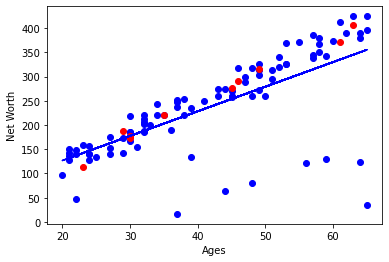

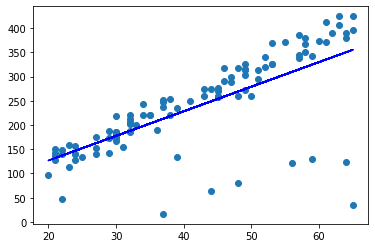

In [5]:
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
reg.predict(ages_test)
print('coef:', reg.coef_[0][0])
print('intercept:', reg.intercept_[0])
print('score:', reg.score(ages_test, net_worths_test))

plt.scatter(ages_train, net_worths_train, color='blue')
plt.scatter(ages_test, net_worths_test, color='red')
plt.plot(ages_train, reg.predict(ages_train), color='blue')
plt.xlabel('Ages')
plt.ylabel('Net Worth')
plt.show()

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

length of cleaned_data: 81


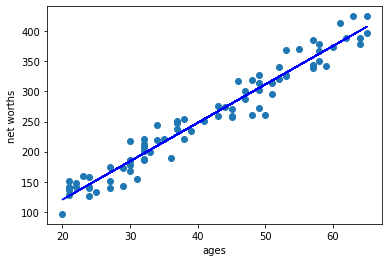

coef-after cleaned: 6.3685948069436655
intercept-after cleaned: -6.918610687302191
score-after cleaned: 0.983189455395532


In [8]:
### identify and remove the most outlier-y points
### Attack and remove outlier

cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

    print('coef-after cleaned:', reg.coef_[0][0])
    print('intercept-after cleaned:', reg.intercept_[0])
    print('score-after cleaned:', reg.score(ages_test, net_worths_test))

else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")